In [2]:
import pickle
from deap import tools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
enemy_ids = [1, 2, 5]
runs = 10
group_id = 1
experiment_name = 'NSGA-II'

In [13]:
runs = 10

In [5]:
with open(f'data/logBook/{experiment_name}/1234567_100_20/logBook_run_{run}.pkl', 'rb') as f:
    logBook = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'data/logBook/NSGA-II/1234567_100_20/logBook_run_10.pkl'

In [9]:
# logBook.select('mean')

<AxesSubplot:>

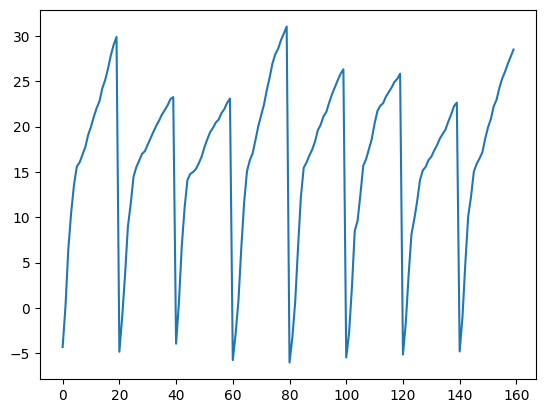

In [15]:
sns.lineplot(data=logBook.select('mean'))

## Load NEAT data

In [9]:
with open(f'neat_result/7,8/run_{run}/genfitnessv', 'rb') as f:
            tryi = pickle.load(f)

In [35]:
def get_avg(genfitnessvs):

    fit_averages_all = []
    fit_max_all = []
    for genfitnessv in genfitnessvs:
        fit_averages = [np.mean(gen) for gen in genfitnessv]
        fit_max = [max(gen) for gen in genfitnessv]
        fit_averages_all.append(fit_averages)
        fit_max_all.append(fit_max)

    # fit_averages_all = np.mean(np.array(fit_averages_all), axis=0)
    # fit_max_all = np.mean(np.array(fit_max_all), axis=0)

    return fit_averages_all, fit_max_all

In [53]:
genfitnessvs = []
gengainvs = []
for run in range(runs):
    with open(f'neat_result/1,2,5/run_{run+1}/genfitnessv', 'rb') as f:
        genfitnessv = pickle.load(f)
        genfitnessvs.append(genfitnessv)

fit_averages_all, fit_max_all = get_avg(genfitnessvs)

logbooks = []

for i in range(runs):
    logBook = pd.DataFrame({'gen': range(50)})
    logBook['mean'] = fit_averages_all[i]
    logBook['max'] = fit_max_all[i]
    logBook['run'] = i
    logbooks.extend([logBook])

logbook_neat_1 = pd.concat(logbooks)
logbook_neat_1.head()

,gen,mean,max,run
0,0,-3.722424,35.265848,0
1,1,-3.612199,35.253130,0
2,2,-3.514337,35.278492,0
3,3,-3.067506,35.259498,0
4,4,-2.914588,35.259498,0


In [54]:
genfitnessvs = []
gengainvs = []
for run in range(runs):
    with open(f'neat_result/7,8/run_{run+1}/genfitnessv', 'rb') as f:
        genfitnessv = pickle.load(f)
        genfitnessvs.append(genfitnessv)

fit_averages_all, fit_max_all = get_avg(genfitnessvs)

logbooks = []

for i in range(runs):
    logBook = pd.DataFrame({'gen': range(50)})
    logBook['mean'] = fit_averages_all[i]
    logBook['max'] = fit_max_all[i]
    logBook['run'] = i
    logbooks.extend([logBook])

logbook_neat_2 = pd.concat(logbooks)
logbook_neat_2.head()

,gen,mean,max,run
0,0,0.966469,75.003548,0
1,1,5.623044,75.003548,0
2,2,5.949389,75.003548,0
3,3,7.932257,75.003548,0
4,4,7.576168,75.003548,0


## Line plots

In [23]:
def read_logbook(group_id, runs):    
    logbooks = []

    for run in range(runs):

        with open(f'group_{group_id}/NSGA-II/logbook/logBook_run_{run}.pkl', 'rb') as f:
            logBook = pickle.load(f)

        logBook = pd.DataFrame.from_dict(logBook)
        logBook['run'] = f'{run}'

        logbooks.extend([logBook])

    logbook = pd.concat(logbooks)

    return logbook

In [74]:
def training_plot(group_id, logbook_nsga, logbook_neat, ax):

    # set fixed y-axis
    ax.set_ylim([0, 100])

    lineplots = sns.lineplot(data=logbook_nsga, x='gen', y='max', errorbar='sd', \
        color='b', label='NSGA-II_max', ax=ax)
    lineplots = sns.lineplot(data=logbook_nsga, x='gen', y='mean', errorbar='sd', \
        color='b', label='NSGA-II_mean', dashes=[2,2], err_style='band', ax=ax)
    lineplots = sns.lineplot(data=logbook_neat, x='gen', y='max', errorbar='sd', \
        color='r', label='NEAT_max', ax=ax)
    lineplots = sns.lineplot(data=logbook_neat, x='gen', y='mean', errorbar='sd', \
        color='r', label='NEAT_mean', dashes=[2,2], err_style='band', ax=ax)

    lineplots.tick_params(axis='x', which='major', bottom=True, top=False, labelbottom=False)

    lineplots.set_xlabel('', fontsize=20)
    lineplots.set_ylabel('fitness value', fontsize=20)
    lineplots.axes.set_title(f'Mean/Max fitness value for group {group_id}', fontsize=20)
    lineplots.tick_params(labelsize=15)
    ax.legend(fontsize=18, loc='lower right').remove()


In [59]:
logbook_nsga_1 = read_logbook(1, runs)
logbook_nsga_2 = read_logbook(2, runs)

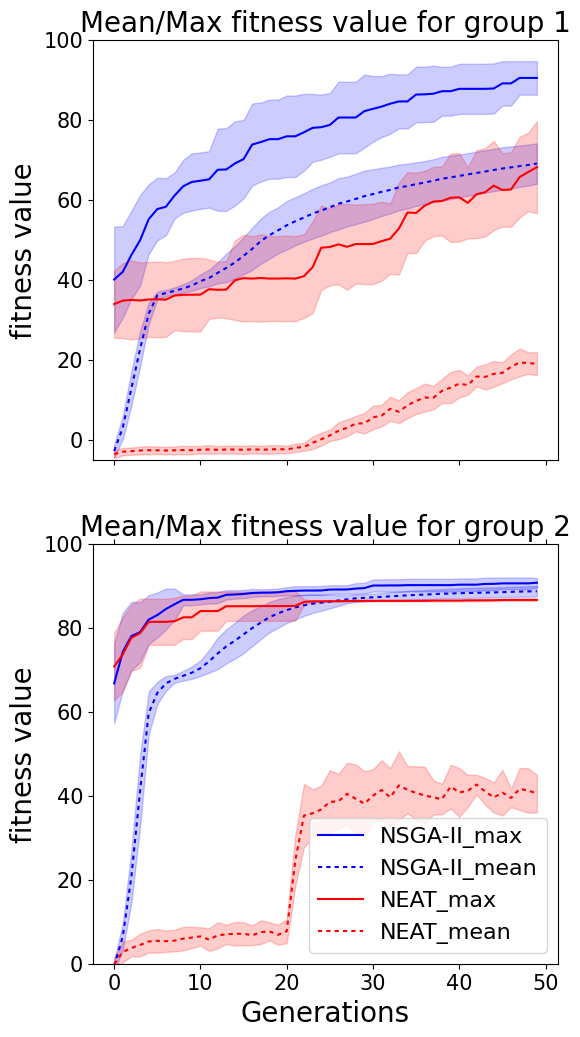

In [75]:
plt.rcParams['figure.figsize'] = (6, 12)
fig_lineplot, ax_lineplot = plt.subplots(2, 1)


training_plot(1, logbook_nsga_1, logbook_neat_1, ax=ax_lineplot[0])
training_plot(2, logbook_nsga_2, logbook_neat_2, ax=ax_lineplot[1])

ax_lineplot[0].set_ylim((-5, None))

ax_lineplot[1].legend(fontsize=16, loc='lower right')
ax_lineplot[1].set_xlabel('Generations', fontsize=20)
ax_lineplot[1].tick_params(axis='x', which='major', bottom=True, top=True, \
    labelbottom=True)

plt.show()

In [76]:
# save lineplots
fig_line = fig_lineplot.get_figure()
fig_line.savefig('training_statistics.pdf', bbox_inches='tight')

## Box plots

In [82]:
def read_test_results(group_id):
    test_nsga = np.loadtxt(f'group_{group_id}/NSGA-II/solution/Gain.txt')
    df1 = pd.DataFrame(test_nsga, columns=['NSGA']).assign(Trial=1)
    test_neat = np.loadtxt(f'NEAT-Gains_{group_id}.txt')
    df2 = pd.DataFrame(test_neat, columns=['NEAT']).assign(Trial=2)

    df_test = pd.concat([df1, df2])
    df_test = pd.melt(df_test, id_vars=['Trial'], var_name=['Number'])  

    return df_test

In [90]:
def test_plot(group_id, df_test, ax):

    boxplots = sns.boxplot(x='Trial', y='value', hue='Number', data=df_test, dodge=False, ax=ax)

    boxplots.set_xlabel('', fontsize=20)
    boxplots.set_ylabel('Average Gains', fontsize=20)
    boxplots.axes.set_title(f'Average Gains for group {group_id}', fontsize=20)
    # boxplots.set_xticklabels(['Biased', 'Random'])
    boxplots.tick_params(axis='x', which='major', bottom=True, top=False, labelbottom=False)
    ax.legend().remove()

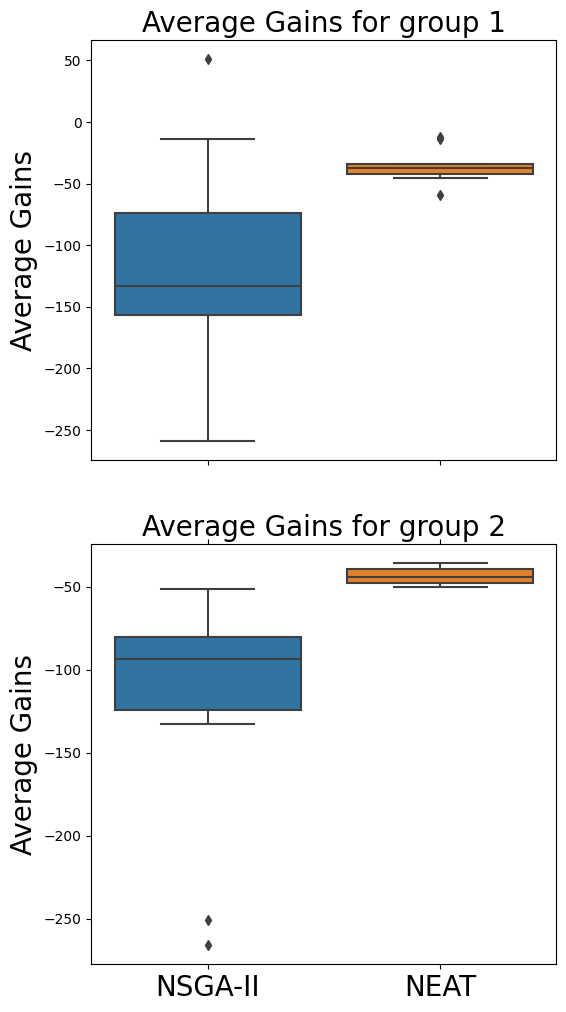

In [93]:
plt.rcParams['figure.figsize'] = (6, 12)
fig_boxplot, ax_boxplot = plt.subplots(2, 1)


df_test_1 = read_test_results(1)
df_test_2 = read_test_results(2)

test_plot(1, df_test_1, ax=ax_boxplot[0])
test_plot(2, df_test_2, ax=ax_boxplot[1])

ax_boxplot[1].set_xticklabels(['NSGA-II', 'NEAT'])
ax_boxplot[1].tick_params(axis='x', which='major', bottom=True, top=True, \
    labelbottom=True, labelsize=20)

plt.show()

In [94]:
# save boxplots
fig_box = fig_boxplot.get_figure()
fig_box.savefig(f'test_boxplot_2.pdf', bbox_inches='tight')

In [101]:
bgain = np.loadtxt('bsol/Plife')

In [105]:
bgain

array([[90.  , 78.  ,  0.  ,  0.  , 65.2 ,  0.  ,  0.  , 25.6 ],
       [90.  , 78.  ,  0.  ,  0.  , 77.32,  0.  ,  0.  , 25.6 ],
       [90.  , 78.  ,  0.  ,  0.  , 75.28,  0.  ,  0.  , 25.6 ],
       [90.  , 78.  ,  0.  ,  0.  , 72.76,  0.  ,  0.  , 25.6 ],
       [90.  , 78.  ,  0.  ,  0.  , 73.48,  0.  ,  0.  , 25.6 ],
       [90.  , 78.  ,  0.  ,  0.  , 76.72,  0.  ,  0.  , 25.6 ],
       [90.  , 78.  ,  0.  ,  0.  , 68.56,  0.  ,  0.  , 25.6 ],
       [90.  , 78.  ,  0.  ,  0.  , 77.68,  0.  ,  0.  , 25.6 ],
       [90.  , 78.  ,  0.  ,  0.  , 79.48,  0.  ,  0.  , 25.6 ],
       [90.  , 78.  ,  0.  ,  0.  , 80.92,  0.  ,  0.  , 25.6 ]])

In [106]:
bgain.mean(axis=0)

array([90.  , 78.  ,  0.  ,  0.  , 74.74,  0.  ,  0.  , 25.6 ])

In [107]:
bgain.std(axis=0)

array([0.        , 0.        , 0.        , 0.        , 4.63555822,
       0.        , 0.        , 0.        ])